<a href="https://colab.research.google.com/github/seohyun126/24Analysis_BASE/blob/week3/boaz_cnn_ha_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

CNN 학습 결과가 잘 나오는 MNIST 데이터셋으로 실습을 진행해봅시다!

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
import cv2
import matplotlib.pyplot as plt

In [2]:
# myCNN 클래스 정의
class myCNN(nn.Module):
    def __init__(self):
        super(myCNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size = 5, padding = 2)
        self.conv2 = nn.Conv2d(32, 64, kernel_size = 5, padding = 2)
        self.conv3 = nn.Conv2d(64, 128, kernel_size = 5, padding = 2)
        self.fc1 = nn.Linear(128*3*3, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x), 2))
        x = F.relu(F.max_pool2d(self.conv2(x), 2))
        x = F.relu(F.max_pool2d(self.conv3(x), 2))
        x = x.view(-1, 128*3*3)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return F.log_softmax(x, dim = 1)

In [3]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

train_dataset = datasets.MNIST('./data', train = True, download = True, transform = transform)
test_dataset = datasets.MNIST('./data', train = False, transform = transform)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size = 64, shuffle = True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size = 1000, shuffle = False)

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 9.91M/9.91M [00:11<00:00, 892kB/s] 


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 28.9k/28.9k [00:00<00:00, 64.3kB/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 1.65M/1.65M [00:01<00:00, 1.24MB/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 4.54k/4.54k [00:00<00:00, 9.63MB/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



모델, 손실 함수, 최적화 알고리즘 설정 ✅

In [4]:
# TODO
# 모델 초기화 하가
model=myCNN()
# GPU 사용 설정
device=torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)
# 손실 함수 - 다중분류 Cross Entropy 사용
criterion=nn.CrossEntropyLoss()
# 옵티마이저 설정 - Adam 사용
optim=optim.Adam(model.parameters(),lr=0.001)

In [5]:
device

device(type='cuda')

모델 학습 ✅

모델 평가 ✅

10회 반복 시행 ✅

In [6]:
# TODO
# 모델 학습 및 평가
# 10번 반복 시행 -> epoch 수 10
num_epochs = 10

# 훈련/테스트 손실 저장 리스트
train_losses=[]
test_losses=[]
# 테스트 accuracy score 저장 리스트
test_accuracies=[]


for epoch in range(num_epochs):
    model.train()
    training_loss = 0.0

    # 학습 데이터로 모델 훈련시키기
    for data, target in train_loader:
        data, target = data.to(device), target.to(device)
        # 그래디언트 초기화
        optim.zero_grad()
        output = model(data)
        # loss 계산 후 역전파 , 가중치 업데이트
        loss = criterion(output, target)
        loss.backward()
        optim.step()
        training_loss += loss.item()
    train_losses.append(training_loss/len(train_loader))

    # 모델 평가하기
    model.eval()
    correct = 0
    total = 0
    testing_loss = 0.0
    # 평가에선 기울기 계산이 없음
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            loss = criterion(output, target)
            testing_loss += loss.item()
            # 예측된 라벨 계산
            _, predicted = torch.max(output, 1)
            total += target.size(0)
            # 맞는거 몇개인지
            correct += (predicted == target).sum().item()
    test_losses.append(testing_loss/len(test_loader))
    test_accuracies.append(correct/ total)
    # 각 에포크에서 accuracy score 확인
    print(f'Test Accuracy: {correct/ total:.2f}%')

Test Accuracy: 0.99%
Test Accuracy: 0.99%
Test Accuracy: 0.99%
Test Accuracy: 0.99%
Test Accuracy: 0.99%
Test Accuracy: 0.99%
Test Accuracy: 0.99%
Test Accuracy: 0.99%
Test Accuracy: 0.99%
Test Accuracy: 0.99%


결과 시각화

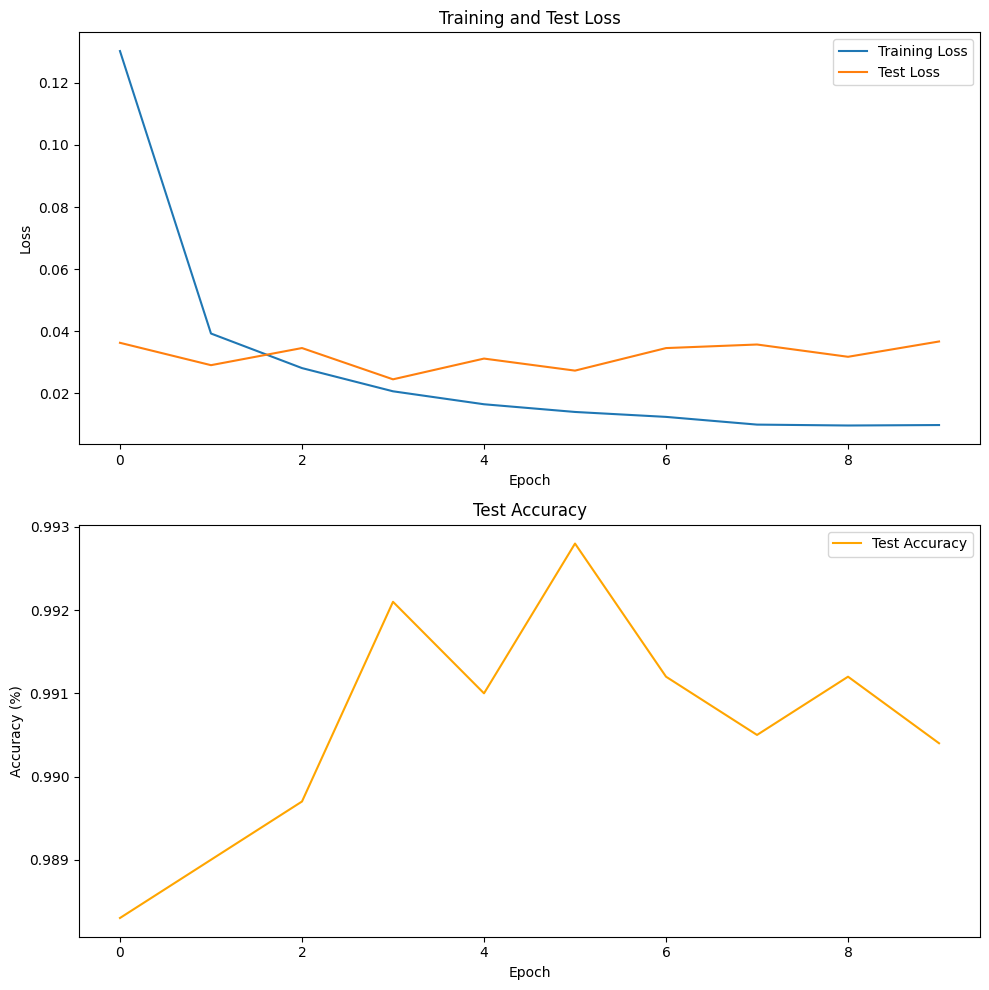

In [7]:
# 손실 및 정확도 시각화
fig, axs = plt.subplots(2,1,figsize=(10,10))
axs[0].plot(train_losses, label = 'Training Loss')
axs[0].plot(test_losses, label = 'Test Loss')
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Loss')
axs[0].legend()
axs[0].set_title('Training and Test Loss')

axs[1].plot(test_accuracies, label='Test Accuracy', color='orange')
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('Accuracy (%)')
axs[1].legend()
axs[1].set_title('Test Accuracy')

plt.tight_layout()
plt.show()

epoch수가 5일 때 test에서 정확도가 가장 높음이 확인됨!